In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
team_count = 22
teams = range(team_count)
skill_count = 6
skills = range(skill_count)

In [4]:
uni_hind = pd.read_csv("uni_hind.csv", names = skills)
uni_day = pd.read_csv("uni_day.csv", names = skills)
#norm_hind = pd.read_csv("norm_hind.csv", names = skills)
#norm_day = pd.read_csv("norm_day.csv", names = skills)
#chunk_hind = pd.read_csv("chunk_hind.csv", names = skills)
#chunk_day = pd.read_csv("chunk_day.csv", names = skills)

In [5]:
team_skill = pd.read_csv("team_skill.csv", names = skills)

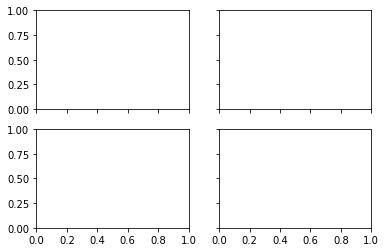

In [6]:
fig, axs = plt.subplots(2, 2, sharex = 'col', sharey = 'row')

In [7]:
def make_regression(assignment, out = "basic", graph = False, title=""):
    count = 0
    if out == "spec":
        rows = range(10, 22)
    elif out =="div":
        rows = range(10)
    else:
        rows = teams
    regression = pd.DataFrame(index=range(len(rows)*skill_count), columns = ["assign", "skill", "skill_type", "spec_skill", "spec"])
    for team in rows:
        for skill_type in skills:
            assign = assignment[skill_type].loc[team]
            skill = team_skill[skill_type].loc[team]
            if team > 9:
                spec_skill = skill
                spec = 1
            else:
                spec_skill = 0
                spec = 0
            regression.loc[count] = [assign, skill, skill_type, spec_skill, spec]
            count+=1
    y = regression["assign"]  
    hue = regression["skill_type"]
    if out == "compare":
        x_spec = regression[["skill", "spec_skill", "spec"]]
        model_spec = sm.OLS(y.astype(float),x_spec.astype(float)).fit()
        predictions_spec = model_spec.predict(x_spec.astype(float))
        return model_spec
    else:
        x_basic = regression["skill"]
        model_basic = sm.OLS(y.astype(float),x_basic.astype(float)).fit()
        predictions_basic = model_basic.predict(x_basic.astype(float))
        if graph==True:
            graph = sns.lmplot(x='skill', y='assign', hue='skill_type', data=regression, fit_reg=False)
            # sns.regplot(x='skill', y='assign', data=regression, scatter=False)
            sns.regplot(x_basic.astype(float),y.astype(float),scatter=False, ax=graph.axes[0, 0]).set_title(title)
        else:
            return model_basic


    

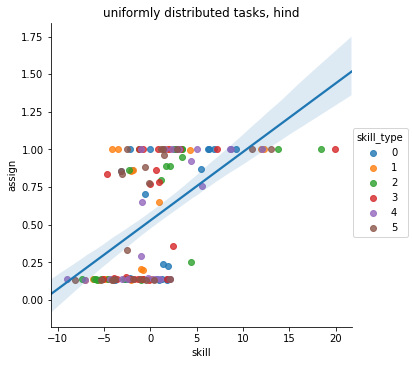

In [8]:
make_regression(uni_hind,"basic", True, "uniformly distributed tasks, hind")

In [9]:
make_regression(uni_hind).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 assign   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     24.74
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           2.02e-06
Time:                        17:00:31   Log-Likelihood:                -124.26
No. Observations:                 132   AIC:                             250.5
Df Residuals:                     131   BIC:                             253.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
skill          0.0538      0.011      4.974      0.000       0.032       0.075
==============================================================================
Omnibus:                       40.011   Durbin-Watson:                   0.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.483
Skew:                           0.241   Prob(JB):                       0.0144
Kurtosis:                       1.856   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

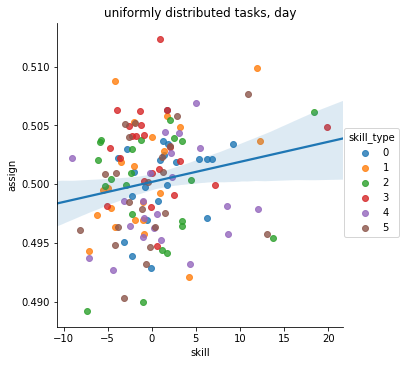

In [10]:
make_regression(uni_day,"basic", True, "uniformly distributed tasks, day")

In [11]:
make_regression(uni_day).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 assign   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8383
Date:                Mon, 30 Apr 2018   Prob (F-statistic):              0.362
Time:                        17:00:32   Log-Likelihood:                -95.456
No. Observations:                 132   AIC:                             192.9
Df Residuals:                     131   BIC:                             195.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
skill          0.0080      0.009      0.916      0.362      -0.009       0.025
==============================================================================
Omnibus:                       36.019   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.233
Skew:                          -1.253   Prob(JB):                     1.86e-14
Kurtosis:                       5.283   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
make_regression(norm_hind, "basic", True, "normal, hindsight")

NameError: name 'norm_hind' is not defined

In [ ]:
make_regression(norm_hind).summary()

In [ ]:
make_regression(norm_day, "basic", True, "normal, day, div")

In [ ]:
make_regression(norm_day).summary()

In [ ]:
make_regression(chunk_hind, "basic", True, "chunk, hindsight")

In [ ]:
make_regression(chunk_hind).summary()

In [ ]:
make_regression(chunk_day, "spec", True, "chunk, day, spec")

In [ ]:
make_regression(chunk_day).summary()